# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [ ]:
goog_df = pd.read_csv('/content/drive/MyDrive/Google Stock Price/GOOG.csv')

close_col = goog_df.iloc[:, 4:5].values
close_col[:10]

array([[49.982655],
       [53.95277 ],
       [54.495735],
       [52.239197],
       [52.802086],
       [53.753517],
       [52.876804],
       [50.814533],
       [50.993862],
       [49.93782 ]])

In [ ]:
train_set = goog_df["Close"].iloc[:4309]
test_set = goog_df["Close"].iloc[4309:]

### Feature Scaling

In [2]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
close_col_scaled = sc.fit_transform(close_col)

NameError: ignored

### Creating a data structure with 60 timesteps and 1 output



In [ ]:
X_train = []
y_train = []

for i in range(60, 4308):
    X_train.append(close_col_scaled[i-60:i, 0])
    y_train.append(close_col_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [ ]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [ ]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [ ]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
133/133 [==============================] - 26s 134ms/step - loss: 0.0035
Epoch 2/100
133/133 [==============================] - 18s 132ms/step - loss: 9.1801e-04
Epoch 3/100
133/133 [==============================] - 17s 131ms/step - loss: 0.0012
Epoch 4/100
133/133 [==============================] - 18s 132ms/step - loss: 7.9180e-04
Epoch 5/100
133/133 [==============================] - 17s 131ms/step - loss: 7.6748e-04
Epoch 6/100
133/133 [==============================] - 17s 131ms/step - loss: 6.9420e-04
Epoch 7/100
133/133 [==============================] - 18s 134ms/step - loss: 7.7072e-04
Epoch 8/100
133/133 [==============================] - 18s 132ms/step - loss: 6.6341e-04
Epoch 9/100
133/133 [==============================] - 18s 134ms/step - loss: 7.2588e-04
Epoch 10/100
133/133 [==============================] - 18s 132ms/step - loss: 5.7161e-04
Epoch 11/100
133/133 [==============================] - 18s 133ms/step - loss: 6.4216e-04
Epoch 12/100
133/133 [=====

## Part 3 - Making the predictions and visualising the results

### Getting the predicted stock price of 2017

In [ ]:
inputs = goog_df["Close"][len(train_set) - len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 120):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Visualising the results

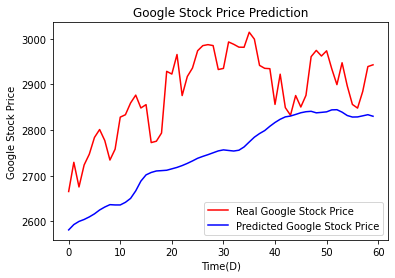

In [ ]:
plt.plot(test_set.to_numpy(), color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time(D)')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()